In [4]:
# Import necessary libraries
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Function to load and preprocess images
def load_and_preprocess_images(dataset_path, image_size=(128, 128)):
    images = []
    labels = []

    for label, person in enumerate(os.listdir(dataset_path)):
        person_path = os.path.join(dataset_path, person)
        for image_name in os.listdir(person_path):
            image_path = os.path.join(person_path, image_name)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, image_size)
            images.append(image)
            labels.append(label)

    return np.array(images), np.array(labels)

# Load and preprocess the dataset
dataset_path = '/content/Datasets'
images, labels = load_and_preprocess_images(dataset_path)

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, encoded_labels, test_size=0.2, random_state=42)

# Define the model architecture (a simple CNN for demonstration)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(encoded_labels)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Save the model for future use
model.save('face_recognition_model.h5')

# You can then use this model for face recognition on new images.

Epoch 1/10
8/8 [==============================] - 6s 588ms/step - loss: 2015.1091 - accuracy: 0.3708 - val_loss: 1615.7290 - val_accuracy: 0.3607
Epoch 2/10
8/8 [==============================] - 4s 546ms/step - loss: 893.3275 - accuracy: 0.5458 - val_loss: 369.4481 - val_accuracy: 0.4918
Epoch 3/10
8/8 [==============================] - 5s 645ms/step - loss: 106.8470 - accuracy: 0.6208 - val_loss: 47.4429 - val_accuracy: 0.3934
Epoch 4/10
8/8 [==============================] - 4s 521ms/step - loss: 18.9120 - accuracy: 0.6167 - val_loss: 23.1711 - val_accuracy: 0.4918
Epoch 5/10
8/8 [==============================] - 4s 536ms/step - loss: 4.0682 - accuracy: 0.8250 - val_loss: 28.6616 - val_accuracy: 0.4590
Epoch 6/10
8/8 [==============================] - 9s 1s/step - loss: 1.1986 - accuracy: 0.9292 - val_loss: 14.8622 - val_accuracy: 0.5738
Epoch 7/10
8/8 [==============================] - 12s 1s/step - loss: 0.0420 - accuracy: 0.9917 - val_loss: 15.4038 - val_accuracy: 0.5902
Epoch 8

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 115ms/step


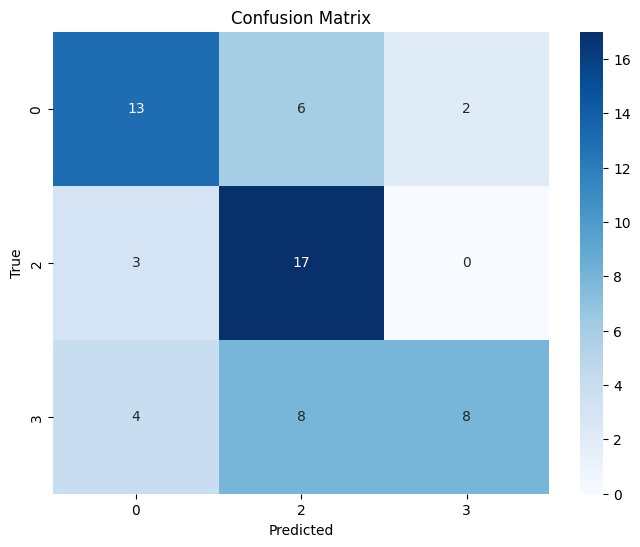

2/2 [==============================] - 0s 124ms/step


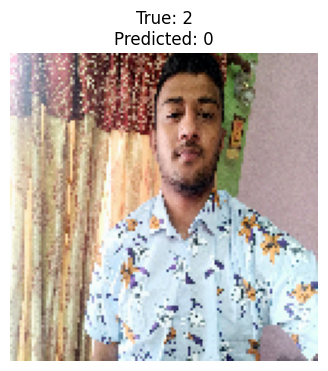

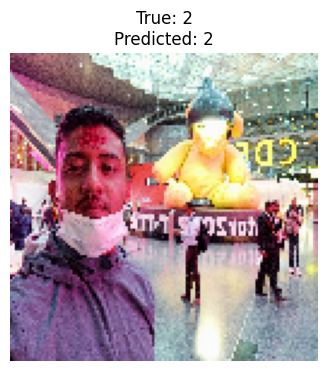

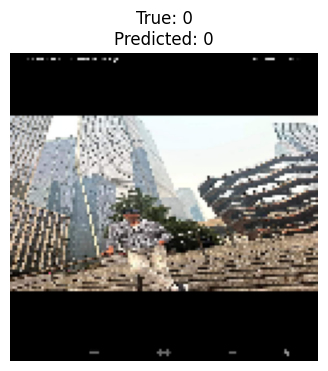

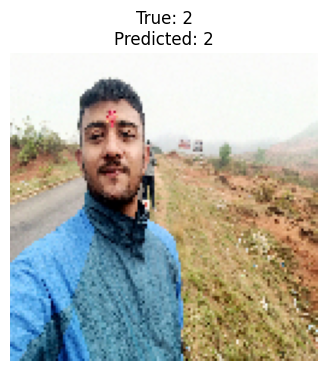

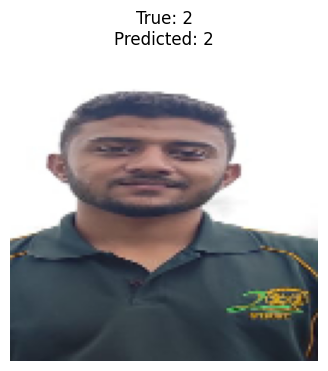

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Function to plot a confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Function to plot sample predictions
def plot_sample_predictions(model, X_test, y_test, label_encoder, num_samples=5):
    predictions = model.predict(X_test)
    predicted_labels = np.argmax(predictions, axis=1)

    class_names = [str(label_encoder.classes_[i]) for i in range(len(label_encoder.classes_))]

    for i in range(num_samples):
        index = np.random.randint(0, len(X_test))
        image = X_test[index]
        true_label = label_encoder.classes_[y_test[index]]
        predicted_label = label_encoder.classes_[predicted_labels[index]]

        plt.figure(figsize=(4, 4))
        plt.imshow(image)
        plt.title(f'True: {true_label}\nPredicted: {predicted_label}')
        plt.axis('off')
        plt.show()

# Plot confusion matrix
plot_confusion_matrix(y_test, model.predict(X_test).argmax(axis=1), label_encoder.classes_)

# Plot sample predictions
plot_sample_predictions(model, X_test, y_test, label_encoder)